# Imports and Defaults

In [ ]:
import os
import numpy as np
import icecream as ic
import matplotlib.pyplot as plt
import seaborn as sns

from multi_dimensional_scaling import MultiDimensionalScaling
from isomap import IsoMap
from locally_linear_embeddings import LocallyLinearEmbeddings

In [8]:
path_to_data = 'data/'
sns.set_theme()

%load_ext autoreload
%autoreload 2

# Data Imports and Exploration

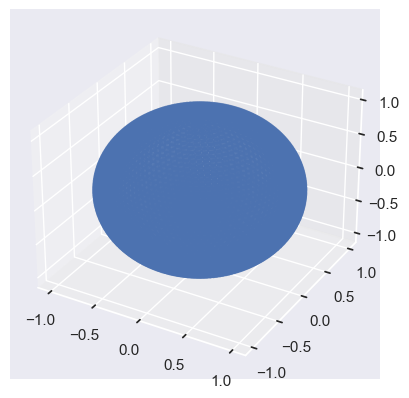

In [9]:
# import data
fname = os.path.join(path_to_data, 'ps2-data-1.txt')
X = np.loadtxt(fname, delimiter='\t', usecols=(1,2,3))

# plot data
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

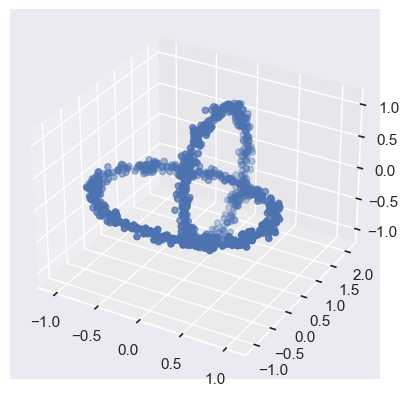

In [10]:
fname = os.path.join(path_to_data, 'ps2-data-2.txt')
X = np.loadtxt(fname, delimiter='\t', usecols=(1,2,3))

# plot data
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

# Multi Dimensional Scaling

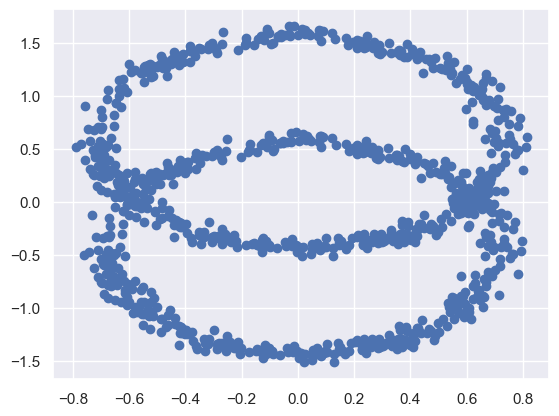

In [5]:
mds = MultiDimensionalScaling(d=2, dissimilarity='euclidean')
Y = mds.fit_transform(X)
plt.scatter(Y[:, 0], Y[:, 1])

# Isomap

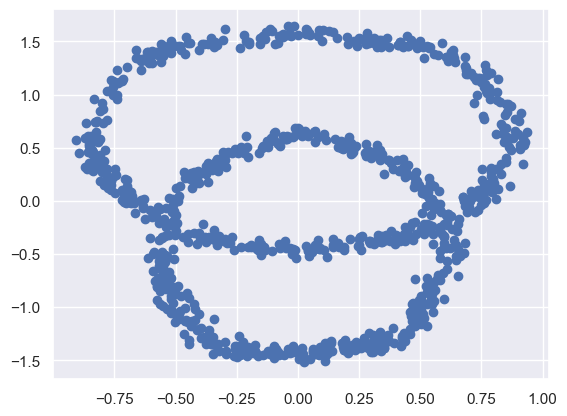

In [8]:
isomap = IsoMap(n_neighbors=250, d=2)
Y = isomap.fit_transform(X)

plt.scatter(Y[:, 0], Y[:, 1])

# Locally Linear Embeddings

In [58]:
lle = LocallyLinearEmbeddings(n_neighbors=400, embedding_dim=2)
Y = lle.fit_transform(X)
plt.scatter(Y[:, 0], Y[:, 1])